In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Path to your dataset folder (adjust if different)
data_dir = 'C:/Users/ASUS TUF/Desktop/edunet2/AI_Waste_Management_Project_Full/waste_dataset/Garbage Classification'

# Check number of images per class
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        print(f"{folder}: {len(os.listdir(folder_path))} images")


cardboard: 403 images
glass: 501 images
metal: 410 images
paper: 594 images
plastic: 482 images
trash: 137 images


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [4]:
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\ASUS TUF\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_data, epochs=30, validation_data=val_data)


Epoch 1/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 808ms/step - accuracy: 0.4555 - loss: 1.3716 - val_accuracy: 0.3996 - val_loss: 1.4076
Epoch 2/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 51s 801ms/step - accuracy: 0.4955 - loss: 1.2855 - val_accuracy: 0.4036 - val_loss: 1.3515
Epoch 3/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 802ms/step - accuracy: 0.5302 - loss: 1.2433 - val_accuracy: 0.4394 - val_loss: 1.4740
Epoch 4/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 52s 804ms/step - accuracy: 0.5172 - loss: 1.2378 - val_accuracy: 0.4911 - val_loss: 1.3284
Epoch 5/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 53s 829ms/step - accuracy: 0.5289 - loss: 1.1773 - val_accuracy: 0.5010 - val_loss: 1.2850
Epoch 6/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 55s 855ms/step - accuracy: 0.5569 - loss: 1.1543 - val_accuracy: 0.5249 - val_loss: 1.2927
Epoch 7/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 61s 957ms/step - accuracy: 0.5861 - loss: 1.1222 - val_accuracy: 0.5089 - val_loss: 1.2468
Epoch 8/30
64/64 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5749 - loss: 1.1308 - val_accurac

In [18]:
model.save('waste_classifier.h5')


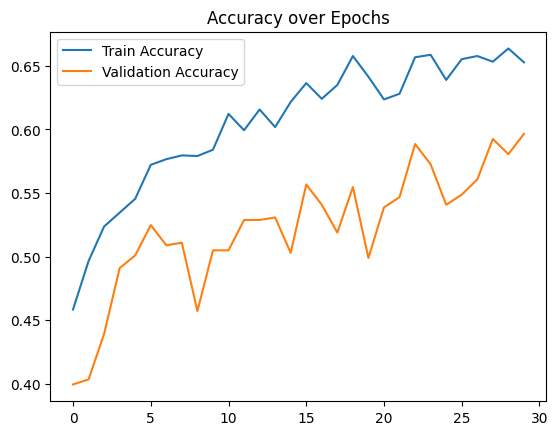

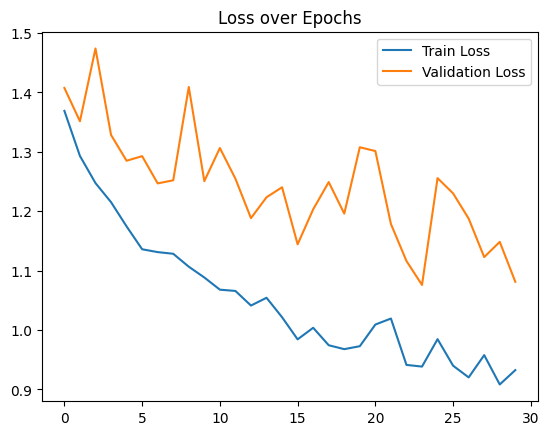

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 398ms/step


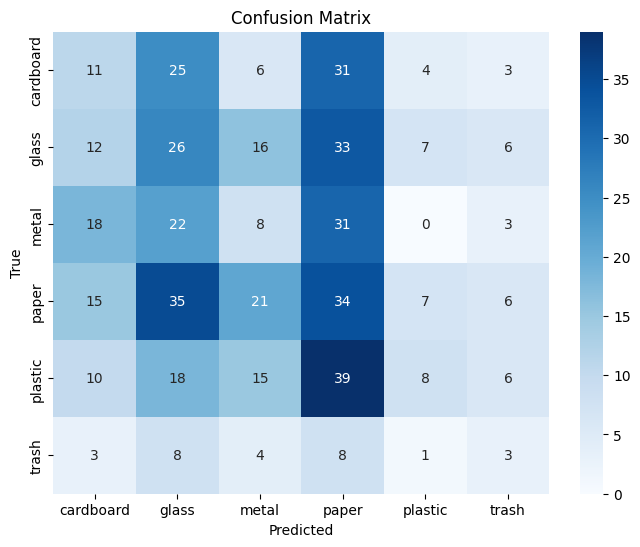

              precision    recall  f1-score   support

   cardboard       0.16      0.14      0.15        80
       glass       0.19      0.26      0.22       100
       metal       0.11      0.10      0.11        82
       paper       0.19      0.29      0.23       118
     plastic       0.30      0.08      0.13        96
       trash       0.11      0.11      0.11        27

    accuracy                           0.18       503
   macro avg       0.18      0.16      0.16       503
weighted avg       0.19      0.18      0.17       503



In [10]:
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))


In [11]:
import json
with open('class_names.json', 'w') as f:
    json.dump(class_names, f)

In [12]:
class_names = list(train_data.class_indices.keys())
print(class_names)


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
